# **Hand Written Digits Recognization**
# Problem Statement
* **Taks 1:-** Prepare a complete data analysis report on the given data.

* **Task 2:-** Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

* **Task3:-** Compare between various models and find the classifier that works better.


To address our handwritten digit recognition project using the **Modified National Institute of Standards and Technology** (MNIST) dataset, we can follow a **standard data science** workflow. Below are detailed steps to resolve each of the three problem statements:



# **Task 1:-Data Analysis Report**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [ ]:
#Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Basic Information
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
#Checking Unique Class
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique classes in y_test: [0 1 2 3 4 5 6 7 8 9]


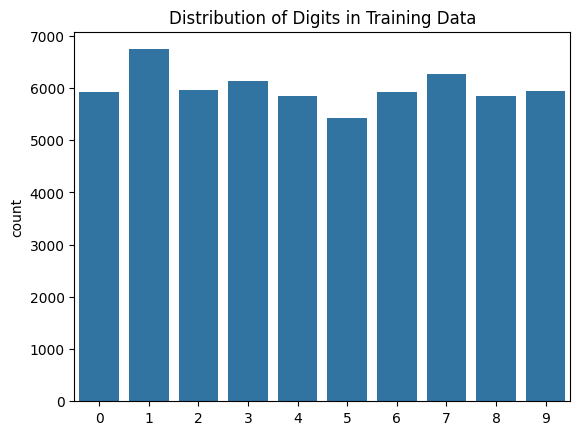

In [ ]:
#Plot Distribution of digits
sns.countplot(x=y_train)
plt.title("Distribution of Digits in Training Data")
plt.show()

**Class distribution (balanced across 0–9)**



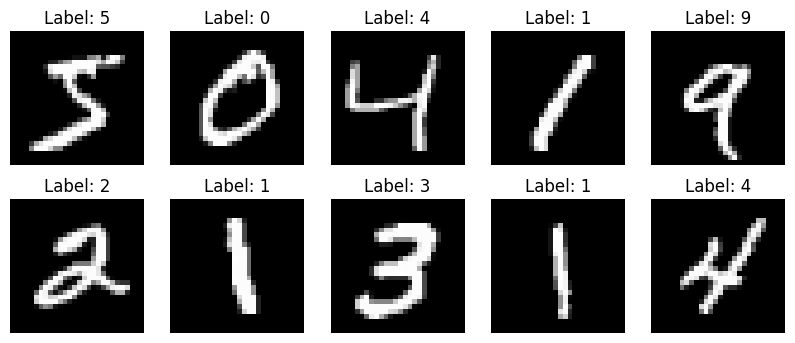

In [ ]:
# Display some sample images
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

**Sample images for visual intuition**

In [ ]:
#Normalize pixel values
X_train = X_train/ 255.0
X_test = X_test/ 255.0

**Normalized values prepare data for ML models**

# **Task 2:Image Classification**

**Build a CNN Classifier(best for image tasks)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
#Preprocess Data
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:

print("X_train shape:", X_train_cnn.shape)
print("y_train shape:", y_train_cat.shape)
print("X_test shape:", X_test_cnn.shape)
print("y_test shape:", y_test_cat.shape)

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [ ]:
#Build CNN model
model= Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* **Dense(100, activation='relu')**: Adds a hidden layer with 100 neurons using ReLU activation.

* **Dense(10, activation='softmax')**: Adds an output layer with 10 neurons (for 10 classes like digits 0–9) using softmax to give probabilities.



In [ ]:
# Compile and Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train_cat, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8902 - loss: 0.3618 - val_accuracy: 0.9741 - val_loss: 0.0891
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9797 - loss: 0.0680 - val_accuracy: 0.9823 - val_loss: 0.0616
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9876 - loss: 0.0394 - val_accuracy: 0.9836 - val_loss: 0.0606
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.9836 - val_loss: 0.0582
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9857 - val_loss: 0.0510


In [ ]:
#Evaluate
loss, acc = model.evaluate(X_test_cnn, y_test_cat)
print(f"Test Accuracy: {acc*100:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9790 - loss: 0.0664
Test Accuracy: 98.1900


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


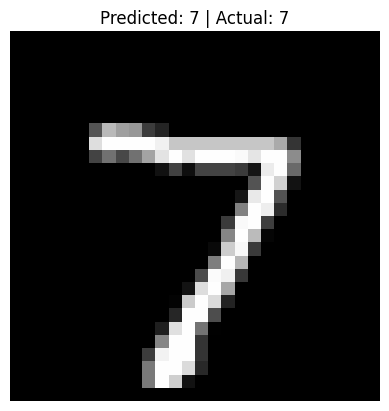

In [ ]:
#Prdict and display one sample
pred=model.predict(np.expand_dims(X_test_cnn[0],axis=0))
predicted_lable=np.argmax(pred)

plt.imshow(X_test[0],cmap='gray')
plt.title(f"Predicted: {predicted_lable} | Actual: {y_test[0]}")
plt.axis('off')
plt.show()

# **Task 3:- Model Comparison**

**Train Multiple Models(Traditional + Deep Learning)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
#Flatten images for traditional
#Flatten images for traditional
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

In [ ]:
#Train/Test Split (For evalution)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

In [ ]:
# Define models
models={
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

In [ ]:
#Train and Evaluate
for name, model in models.items():
  print(f"Training {name}...") # Added print to track progress
  model.fit(X_train_split,y_train_split)
  y_pred=model.predict(X_val_split)
  accuracy=accuracy_score(y_val_split,y_pred)
  print(f"{name} Accuracy: {accuracy*100:.2f}%\n") # Added newline for readability

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 92.22%

Training Random Forest...
Random Forest Accuracy: 96.82%

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 97.15%

Training Support Vector Machine...
Support Vector Machine Accuracy: 97.76%



# We can use **CNN** for production-level performance.